In [4]:
import collaborative_filtering_tools as cft
import numpy as np

print 'dataset_name = ',cft.csv_name

dataset_n_lines = cft.load_dataset_line_number()
print 'dataset_n_lines =',dataset_n_lines

dataset_n_chunks = float(dataset_n_lines)/cft.max_chunksize
print 'dataset_n_chunks = ',dataset_n_chunks

dataset_client_ids = cft.get_client_ids()
print 'dataset_n_clients = ', dataset_client_ids.shape[0]

utility_matrix = cft.load_utility_matrix()
product_ids = cft.get_product_ids()

dataset_name =  train_ver2
dataset_n_lines = 13647310
dataset_n_chunks =  1364.731
dataset_n_clients =  956645


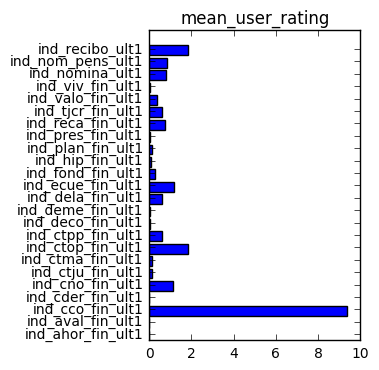

In [2]:
# plot mean_user_rating
mean_user_rating = np.nanmean(utility_matrix,axis=0)
    
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(122)
ax1.barh(range(mean_user_rating.shape[0]),mean_user_rating)
plt.yticks(np.array(range(mean_user_rating.shape[0]))+0.5, product_ids)
plt.title('mean_user_rating')
plt.show()

In [4]:
item_prediction = cft.predict_memory_based(utility_matrix, type='item')
print item_prediction.shape

(956645, 24)
